## **IPSL Meridional ovErTurning ciRculation diagnostIC (METRIC) Configurations**

#### Created By:

Ollie Tooth (oliver.tooth@noc.ac.uk)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
fpath="/g100_store/DRES_OptimESM/ESGF/external/20250619/CMIP6Plus/CMIP/IPSL/IPSL-CM6-ESMCO2/esm-hist/r1i1p3f1/Omon/thetao/gn/v20250318/thetao_Omon_IPSL-CM6-ESMCO2_esm-hist_r1i1p3f1_gn_185001-194912.nc"

ds_thetao = xr.open_dataset(fpath)
ds_thetao

<xarray.Dataset> Size: 43GB
Dimensions:             (time: 1200, bnds: 2, lev: 75, j: 332, i: 362,
                         vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 10kB 1850-01-16T12:00:00 ... 19...
  * lev                 (lev) float64 600B 0.5058 1.556 ... 5.698e+03 5.902e+03
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 326 327 328 329 330 331
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 356 357 358 359 360 361
    latitude            (j, i) float64 961kB ...
    longitude           (j, i) float64 961kB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 19kB ...
    lev_bnds            (lev, bnds) float64 1kB ...
    vertices_latitude   (j, i, vertices) float64 4MB ...
    vertices_longitude  (j, i, vertices) float64 4MB ...
    thetao              (time, lev, j, i) float32 43GB ...
Attributes: (12/46)
    CDO:                    Climate Data Operators version 2.4.4 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  56575.0
    ...                     ...
    title:                  IPSL-CM6-ESMCO2 output prepared for CMIP6Plus
    variable_id:            thetao
    variant_label:          r1i1p3f1
    license:                CMIP6Plus model data produced by IPSL is licensed...
    cmor_version:           3.9.0
    tracking_id:            hdl:21.14100/cbc2efff-c847-446b-8d71-1910f9982c3b

/scratch_local/slurm_job.17107276/ipykernel_32234/2022532723.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(ds_thetao.longitude, ds_thetao.latitude, ds_thetao.thetao.isel(time=0, lev=0))


(5.0, 35.0)

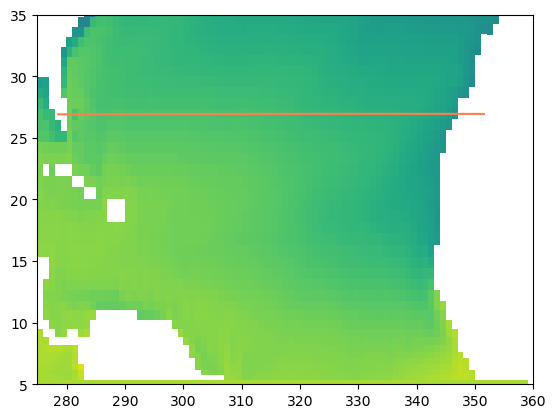

In [16]:
i1 = 206
i2 = 280
j1 = 229
j2 = 229

plt.pcolormesh(ds_thetao.longitude, ds_thetao.latitude, ds_thetao.thetao.isel(time=0, lev=0))
plt.plot(ds_thetao.longitude.isel(i=slice(i1, i2), j=j1), ds_thetao.latitude.isel(i=slice(i1, i2), j=j1), color='coral')

plt.xlim([-85+360, 360])
plt.ylim([5, 35])

In [17]:
ds_thetao.latitude.isel(i=slice(i1, i2), j=j1).mean()

<xarray.DataArray 'latitude' ()> Size: 8B
array(26.94018034)
Coordinates:
    j        int32 4B 229

In [18]:
fc_minlon = -81.0 + 360
fc_maxlon = -77.5 + 360
wbw_maxlon = -76.1 + 360
int_maxlon = -10 + 360

print(fc_minlon, fc_maxlon, wbw_maxlon, int_maxlon)

279.0 282.5 283.9 350


### **Define NEMO t/u/v masks**

In [20]:
# Example T-grid file:
fpath="/g100_store/DRES_OptimESM/ESGF/external/20250619/CMIP6Plus/CMIP/IPSL/IPSL-CM6-ESMCO2/esm-hist/r1i1p3f1/Omon/thetao/gn/v20250318/thetao_Omon_IPSL-CM6-ESMCO2_esm-hist_r1i1p3f1_gn_185001-194912.nc"

ds_thetao = xr.open_dataset(fpath)

# Example U-grid file:
fpath="/g100_store/DRES_OptimESM/ESGF/external/20250619/CMIP6Plus/CMIP/IPSL/IPSL-CM6-ESMCO2/esm-hist/r1i1p3f1/Omon/uo/gn/v20250318/uo_Omon_IPSL-CM6-ESMCO2_esm-hist_r1i1p3f1_gn_185001-194912.nc"
ds_uo = xr.open_dataset(fpath)

# Example V-grid file:
fpath="/g100_store/DRES_OptimESM/ESGF/external/20250619/CMIP6Plus/CMIP/IPSL/IPSL-CM6-ESMCO2/esm-hist/r1i1p3f1/Omon/vo/gn/v20250318/vo_Omon_IPSL-CM6-ESMCO2_esm-hist_r1i1p3f1_gn_185001-194912.nc"
ds_vo = xr.open_dataset(fpath)

In [21]:
t_mask = ~np.isnan(ds_thetao["thetao"].isel(time=0))
u_mask = ~np.isnan(ds_uo["uo"].isel(time=0))
v_mask = ~np.isnan(ds_vo["vo"].isel(time=0))

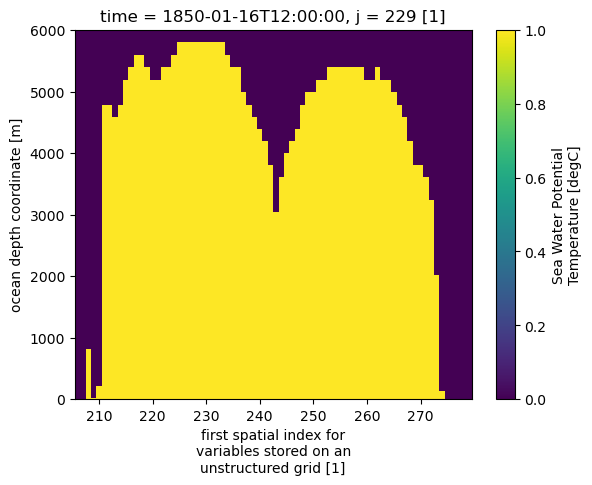

In [22]:
i1 = 206
i2 = 280
j1 = 229
j2 = 229

t_mask.isel(i=slice(i1, i2), j=j1).plot()

In [24]:
# Use IPSL T-grid file as template DataSet:

ds_thetao = ds_thetao.drop_vars(ds_thetao.data_vars)
ds_thetao["tmask"] = t_mask
ds_thetao["umask"] = u_mask
ds_thetao["vmask"] = v_mask

# Write masks to mesh_mask netCDF file:
out_fpath="/g100/home/userexternal/otooth00/OptimESM/data/CINECA/IPSL/IPSL_Ofx/mesh_mask_Ofx_IPSL.nc"
ds_thetao.to_netcdf(out_fpath)

In [25]:
xr.open_dataset(out_fpath)

<xarray.Dataset> Size: 29MB
Dimensions:    (time: 1200, lev: 75, j: 332, i: 362)
Coordinates:
  * time       (time) datetime64[ns] 10kB 1850-01-16T12:00:00 ... 1949-12-16T...
  * lev        (lev) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 324 325 326 327 328 329 330 331
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360 361
    latitude   (j, i) float64 961kB ...
    longitude  (j, i) float64 961kB ...
Data variables:
    tmask      (lev, j, i) bool 9MB ...
    umask      (lev, j, i) bool 9MB ...
    vmask      (lev, j, i) bool 9MB ...
Attributes: (12/46)
    CDO:                    Climate Data Operators version 2.4.4 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  56575.0
    ...                     ...
    title:                  IPSL-CM6-ESMCO2 output prepared for CMIP6Plus
    variable_id:            thetao
    variant_label:          r1i1p3f1
    license:                CMIP6Plus model data produced by IPSL is licensed...
    cmor_version:           3.9.0
    tracking_id:            hdl:21.14100/cbc2efff-c847-446b-8d71-1910f9982c3b

### **Testing METRIC Outputs**

In [26]:
fpath="/g100_work/optim_IAC/research/noc/otooth/OptimESM_WP4/data/IPSL/IPSL-CM6-ESMCO2_esm-hist_r1i1p3f1_1850-01-2014-12_natl_meridional_transports_at_26N.nc"

ds_test = xr.open_dataset(fpath)
ds_test

<xarray.Dataset> Size: 525MB
Dimensions:        (time: 1980, z: 75, zbounds: 76, x: 71, xbounds: 72)
Coordinates:
  * time           (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12...
  * z              (z) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * zbounds        (zbounds) float64 608B 0.0 1.012 2.1 ... 5.8e+03 6.004e+03
  * x              (x) float64 568B 279.5 280.5 281.5 ... 347.5 348.5 349.5
  * xbounds        (xbounds) float64 576B 279.0 280.0 281.0 ... 349.0 350.0
Data variables: (12/62)
    dz             (z) float64 600B ...
    dx             (x) float64 568B ...
    v              (time, z, x) float64 84MB ...
    vgeo           (time, z, x) float64 84MB ...
    dh             (time, z, xbounds) float64 86MB ...
    rho            (time, z, xbounds) float64 86MB ...
    ...             ...
    fw_fc          (time) float64 16kB ...
    fw_ek          (time) float64 16kB ...
    fw_wbw         (time) float64 16kB ...
    fw_geoint      (time) float64 16kB ...
    fw_eddy        (time) float64 16kB ...
    fw_mo          (time) float64 16kB ...
Attributes:
    geostrophic_method:           bottom-up
    geostrophic_reference_level:  4820.0
    reference_to_model_velocity:  None
    eos:                          eos80
    rhocp:                        4084625.0
    ekman_level:                  100.0
    contact:                      fredc.ucar.edu
    code_reference:               https://github.com/NCAR/metric
    method_references:            (1) McCarthy, G. D., and Coauthors, 2015: M...

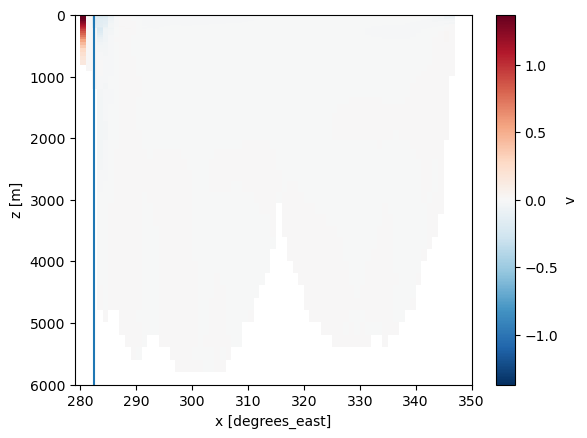

In [27]:
ds_test.v.mean(dim="time").plot()
plt.ylim([6000, 0])
plt.axvline(x=282.5)

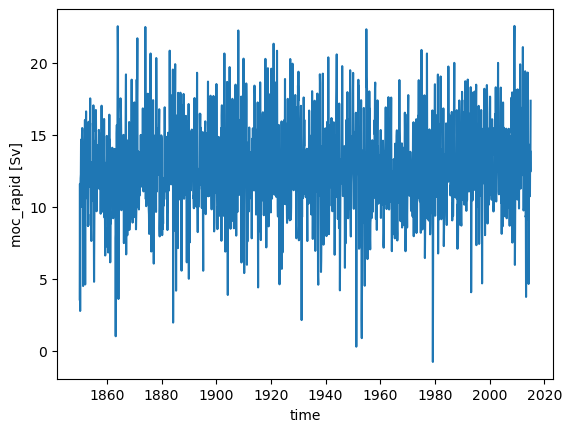

In [29]:
ds_test.moc_rapid.plot()